In [1]:
# importing the important libraries

#Basic libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
from collections import defaultdict
import matplotlib.pyplot as plt


# Surprise libraries

from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import GridSearchCV, cross_validate
from surprise import KNNWithMeans
from surprise.model_selection import train_test_split

In [2]:
os.getcwd()

'E:\\Great Learning\\Projects\\Recommender System'

In [70]:
# reading the csv file into dataframes
file1=pd.read_csv('E:\\Great Learning\\Projects\\Recommender System\\Data Set\\phone_user_review_file_1.csv')
file2=pd.read_csv('E:\\Great Learning\\Projects\\Recommender System\\Data Set\\phone_user_review_file_2.csv')
file3=pd.read_csv('E:\\Great Learning\\Projects\\Recommender System\\Data Set\\phone_user_review_file_3.csv')
file4=pd.read_csv('E:\\Great Learning\\Projects\\Recommender System\\Data Set\\phone_user_review_file_4.csv')
file5=pd.read_csv('E:\\Great Learning\\Projects\\Recommender System\\Data Set\\phone_user_review_file_5.csv')

In [4]:
print(file1.shape)
print(file2.shape)
print(file3.shape)
print(file4.shape)
print(file5.shape)

(374910, 11)
(114925, 11)
(312961, 11)
(98284, 11)
(350216, 11)


In [5]:
# merging the all 5 dataframes into single


mobile=pd.concat([file1,file2,file3,file4,file5],ignore_index=True)

In [6]:
mobile.shape

(1251296, 11)

In [7]:
mobile

phone_url       date lang country  \
0          /cellphones/samsung-galaxy-s8/   5/2/2017   en      us   
1          /cellphones/samsung-galaxy-s8/  4/28/2017   en      us   
2          /cellphones/samsung-galaxy-s8/   5/4/2017   en      us   
3          /cellphones/samsung-galaxy-s8/   5/2/2017   en      us   
4          /cellphones/samsung-galaxy-s8/  5/11/2017   en      us   
...                                   ...        ...  ...     ...   
1251291  /cellphones/sony-ericsson-z710i/   8/7/2006   fr      fr   
1251292  /cellphones/sony-ericsson-z710i/   8/5/2006   fr      fr   
1251293  /cellphones/sony-ericsson-z710i/  7/19/2006   fr      fr   
1251294  /cellphones/sony-ericsson-z710i/   7/9/2006   fr      fr   
1251295  /cellphones/sony-ericsson-z710i/  6/27/2006   fr      fr   

                   source               domain  score  score_max  \
0        Verizon Wireless  verizonwireless.com   10.0       10.0   
1             Phone Arena       phonearena.com   10.0       10.0   
2                  Amazon           amazon.com    6.0       10.0   
3                 Samsung          samsung.com    9.2       10.0   
4        Verizon Wireless  verizonwireless.com    4.0       10.0   
...                   ...                  ...    ...        ...   
1251291       GraphMobile      graphmobile.com   10.0       10.0   
1251292       GraphMobile      graphmobile.com    9.0       10.0   
1251293       GraphMobile      graphmobile.com   10.0       10.0   
1251294       GraphMobile      graphmobile.com    9.0       10.0   
1251295       GraphMobile      graphmobile.com   10.0       10.0   

                                                   extract       author  \
0        As a diehard Samsung fan who has had every Sam...   CarolAnn35   
1        Love the phone. the phone is sleek and smooth ...    james0923   
2        Adequate feel. Nice heft. Processor's still sl...     R. Craig   
3        Never disappointed. One of the reasons I've be...  Buster2020    
4        I've now found that i'm in a group of people t...   S Ate Mine   
...                                                    ...          ...   
1251291  Pour info il est sur amazon.de a 212.99€ s'il ...          NaN   
1251292  Habitué à samsung sony nous sort 1 jolie clam ...          NaN   
1251293  Pour les gens qui ne regarde pas Il fait mp3, ...          NaN   
1251294                  C vrai que sans le mp3 c moyen...          NaN   
1251295                  Il lui manque le mp3 quel dommage          NaN   

                                                   product  
0                                        Samsung Galaxy S8  
1                                        Samsung Galaxy S8  
2        Samsung Galaxy S8 (64GB) G950U 5.8" 4G LTE Unl...  
3                            Samsung Galaxy S8 64GB (AT&T)  
4                                        Samsung Galaxy S8  
...                                                    ...  
1251291                                Sony-Ericsson Z710i  
1251292                                Sony-Ericsson Z710i  
1251293                                Sony-Ericsson Z710i  
1251294                                Sony-Ericsson Z710i  
1251295                                Sony-Ericsson Z710i  

[1251296 rows x 11 columns]

In [8]:
# Exploring and understanding the data

mobile.describe().T

count       mean       std   min   25%   50%   75%   max
score      1199479.0   8.050337  2.622776   0.2   8.0  10.0  10.0  10.0
score_max  1199479.0  10.000000  0.000000  10.0  10.0  10.0  10.0  10.0

In [9]:
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251296 entries, 0 to 1251295
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1251296 non-null  object 
 1   date       1251296 non-null  object 
 2   lang       1251296 non-null  object 
 3   country    1251296 non-null  object 
 4   source     1251296 non-null  object 
 5   domain     1251296 non-null  object 
 6   score      1199479 non-null  float64
 7   score_max  1199479 non-null  float64
 8   extract    1234823 non-null  object 
 9   author     1201151 non-null  object 
 10  product    1251295 non-null  object 
dtypes: float64(2), object(9)
memory usage: 105.0+ MB


In [10]:
print("Minimum rating:", mobile['score'].min())
print("Maximum rating:", mobile['score'].max())

Minimum rating: 0.2
Maximum rating: 10.0


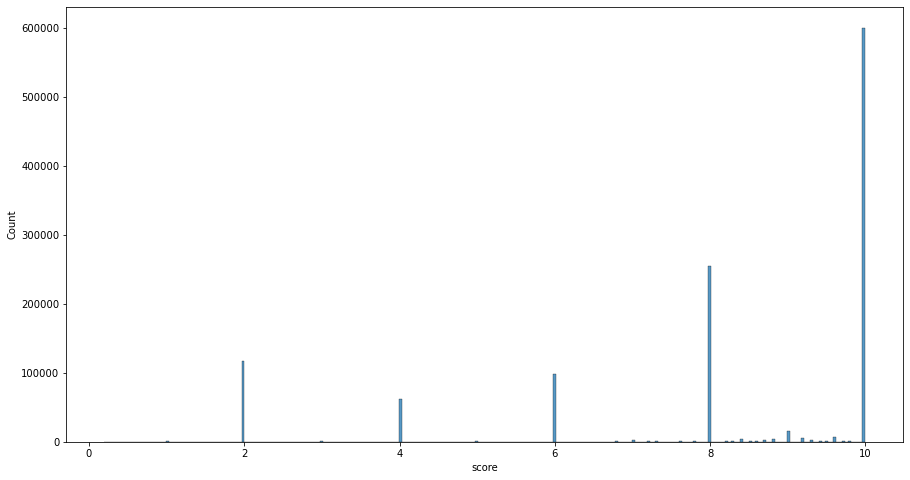

In [11]:
plt.figure(figsize=(15,8))
ax=sns.histplot(data=mobile, x='score')

In [12]:
mobile.isnull().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        51817
score_max    51817
extract      16473
author       50145
product          1
dtype: int64

In [13]:
# Round of score value to nearest integers

mobile['score']=mobile['score'].fillna(value=-1)   # replacing null value with -1 will handle null value later

mobile['score']=mobile['score'].apply(lambda x: round(x))


In [14]:
mobile['score'].value_counts()

 10    609101
 8     263388
 2     117616
 6      99980
 4      62781
-1      51817
 9      34391
 7       6306
 5       2708
 1       1795
 3       1395
 0         18
Name: score, dtype: int64

In [15]:
# Checking and handling missing value
print('count of missing value:\n',mobile.isnull().sum())
print()
print('Percentage of missing value:\n', mobile.isnull().sum()*100/mobile['phone_url'].count())

count of missing value:
 phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score            0
score_max    51817
extract      16473
author       50145
product          1
dtype: int64

Percentage of missing value:
 phone_url    0.000000
date         0.000000
lang         0.000000
country      0.000000
source       0.000000
domain       0.000000
score        0.000000
score_max    4.141067
extract      1.316475
author       4.007445
product      0.000080
dtype: float64


In [16]:
# missing value

unknowns = ['Anonymous','unknown','??????????']
mobile['author'].replace(to_replace = unknowns, 
                          value = np.nan, 
                          inplace=True)


In [17]:
print('count of missing value:\n',mobile.isnull().sum())
print()
print('Percentage of missing value:\n', mobile.isnull().sum()*100/mobile['phone_url'].count())

count of missing value:
 phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score            0
score_max    51817
extract      16473
author       54172
product          1
dtype: int64

Percentage of missing value:
 phone_url    0.000000
date         0.000000
lang         0.000000
country      0.000000
source       0.000000
domain       0.000000
score        0.000000
score_max    4.141067
extract      1.316475
author       4.329271
product      0.000080
dtype: float64


In [18]:
# For Author we will delete null rows because we don't know the author name and its contains only 4.32% of data
mobile.dropna(subset=['author'], inplace=True)

In [19]:
mobile.shape

(1197124, 11)

In [20]:
print(mobile['score_max'].value_counts())

# for score_max will replace null value with 10 

mobile['score_max']=mobile['score_max'].fillna(value=10.0)

10.0    1147574
Name: score_max, dtype: int64


In [21]:
# will replace null of value of score to median(i.e mode)

mobile['score'].value_counts()



 10    583561
 8     251332
 2     113631
 6      94562
 4      59123
-1      49550
 9      33636
 7       6166
 5       2569
 1       1642
 3       1334
 0         18
Name: score, dtype: int64

In [22]:
mobile=mobile.replace(-1, 10)

In [23]:
mobile['score'].value_counts()

10    633111
8     251332
2     113631
6      94562
4      59123
9      33636
7       6166
5       2569
1       1642
3       1334
0         18
Name: score, dtype: int64

In [24]:
# Removing duplicate records

mobile.duplicated().sum()

4693

In [25]:
mobile.drop_duplicates(inplace=True)

In [26]:
mobile.duplicated().sum()

0

In [27]:
# Getting sample of 1 million records

new_mobile=mobile.sample(n=1000000, random_state=612)

In [28]:
new_mobile.shape

(1000000, 11)

In [29]:
# Keeping only relevate features

new_mobile=new_mobile[['author','product','score']]

new_mobile.shape

(1000000, 3)

In [30]:
new_mobile.head()

author                                            product  \
388324  sia vubu elsa  Samsung J100 Galaxy J1 Smartphone, 4GB, Bianco...   
293945    cristian m.  LG G Flex 2 H950 32GB Unlocked GSM Curved P-OL...   
431364    Mithunraj..                  Lenovo Vibe K4 Note (Black, 16GB)   
777529          Joe I      BLU Studio 5.0 C HD Unlocked Cellphone, White   
923795          svdp3                           Sony Ericsson Xperia arc   

        score  
388324      4  
293945     10  
431364     10  
777529     10  
923795     10

In [31]:
# Most rated product

print("Most rated product(By number of reviews):\n", new_mobile['product'].value_counts().head())


Most rated product(By number of reviews):
 Lenovo Vibe K4 Note (White,16GB)     4334
Lenovo Vibe K4 Note (Black, 16GB)    3675
OnePlus 3 (Graphite, 64 GB)          3465
OnePlus 3 (Soft Gold, 64 GB)         2989
Samsung Galaxy Express I8730         2252
Name: product, dtype: int64


In [32]:
print("Most rated product(By highest rating):\n",new_mobile.groupby('product')['score'].mean().sort_values(ascending=False).head())

Most rated product(By highest rating):
 product
金屬 + 皮革 = 質感滿分　Wave 723 詳測及心得                                                                                                            10.0
Huawei Смартфон Huawei P9 32Gb Silver (EVA-L19)                                                                                          10.0
Huawei Сотовый телефон P8 Lite Black                                                                                                     10.0
Huawei.. 5.5" HUAWEI Mate 9 Pro 6GB/128GB LON-L29 Dual SIM Leica Dual Camera Factory Unlocked Cell Phone(Haze Gold) - 1 Year Warranty    10.0
Hummer H5 4 inch Android 4.2 MTK6572 Dual Core 512MB+4G Dual SIM Dual Standby Smartphone                                                 10.0
Name: score, dtype: float64


In [33]:
# User have highest number of reviews

print("User have highest number of reviews:\n", new_mobile['author'].value_counts().head())

User have highest number of reviews:
 Amazon Customer    63672
Cliente Amazon     16217
e-bit               7015
Client d'Amazon     6455
Amazon Kunde        3951
Name: author, dtype: int64


In [34]:
# top 50 author with top 50 rated product

x=new_mobile['author'].value_counts()>=50
y=x[x].index
print(y.shape)

(717,)


In [35]:
x.size

606249

In [36]:
df=new_mobile[new_mobile['author'].isin(y)]

In [37]:
df

author                                            product  \
427573  Amazon Customer                  Lenovo Vibe K4 Note (Black, 16GB)   
117024  Amazon Customer      OnePlus 3T (Soft Gold, 6GB RAM + 64GB memory)   
44888             e-bit                    Smartphone Apple iPhone 6S 16GB   
201942   Cliente Amazon  Microsoft Lumia 640 XL LTE Smartphone, 8 GB, N...   
852576     Amazon Kunde          Apple iPhone 5 32GB schwarz, ohne Vertrag   
...                 ...                                                ...   
367221  Amazon Customer                     Samsung Galaxy E5 (White,16GB)   
362083           Samuel  Lenovo Motorola Moto G4 - Smartphone libre And...   
68737              José  Huawei P9 Lite, 16GB, Dual Sim, pantalla Full ...   
613811            Mauro           Samsung Galaxy Mega 6.3, Bianco [Italia]   
453304            Игорь           Смартфон Sony XPERIA Z2 5.2" 16Gb Purple   

        score  
427573      8  
117024     10  
44888      10  
201942     10  
852576     10  
...       ...  
367221      2  
362083     10  
68737      10  
613811     10  
453304      6  

[189483 rows x 3 columns]

In [38]:
df2=df.groupby('product')['score'].count().reset_index()
df2.rename(columns={'score':'number_of_ratings'}, inplace=True)
df3=df.merge(df2,on='product')

df3.shape

df3=df3[df3['number_of_ratings']>=50]

df3.drop_duplicates(['author', 'product'], inplace=True)

In [39]:
df3.shape

(12116, 4)

In [40]:
df3

author                             product  score  \
0       Amazon Customer   Lenovo Vibe K4 Note (Black, 16GB)      8   
19                Sandy   Lenovo Vibe K4 Note (Black, 16GB)      6   
63               Ashish   Lenovo Vibe K4 Note (Black, 16GB)      4   
75                Rahul   Lenovo Vibe K4 Note (Black, 16GB)     10   
184              Ganesh   Lenovo Vibe K4 Note (Black, 16GB)      8   
...                 ...                                 ...    ...   
133727           Руслан  Samsung S7270 Galaxy Ace 3 (белый)      9   
133730            Антон  Samsung S7270 Galaxy Ace 3 (белый)      9   
133733         Владимир  Samsung S7270 Galaxy Ace 3 (белый)      9   
133743             Alex  Samsung S7270 Galaxy Ace 3 (белый)      9   
133744            Дарья  Samsung S7270 Galaxy Ace 3 (белый)     10   

        number_of_ratings  
0                    2160  
19                   2160  
63                   2160  
75                   2160  
184                  2160  
...                   ...  
133727                 55  
133730                 55  
133733                 55  
133743                 55  
133744                 55  

[12116 rows x 4 columns]

In [41]:

ratings_mean_count = pd.DataFrame(df3.groupby('product')['score'].mean())
ratings_mean_count['number_of_ratings'] = df3.groupby('product')['score'].count()
ratings_mean_count = ratings_mean_count.sort_values(by=['score','number_of_ratings'], ascending=[False,False])

print('Top 5 recommendations for the products are: \n', ratings_mean_count.head())


Top 5 recommendations for the products are: 
                                                score  number_of_ratings
product                                                                
ASUS ZenFone 3 Max ZC520TL 16GB (золотистый)    10.0                 37
ASUS ZenFone 3 Max ZC520TL 16GB (серебристый)   10.0                 35
ASUS ZenFone 3 Max ZC520TL 16GB (серый)         10.0                 34
Nokia E51 Cep Telefonu                          10.0                 29
Nokia 6300 Cep Telefonu                         10.0                 28


In [42]:
#pip install scikit-surprise


In [43]:
# laoding and spliting data into train and test 

reader = Reader(rating_scale = (0,10)) 
data = Dataset.load_from_df(df3[["author","product","score"]], reader=reader)
trainset, testset = train_test_split(data, test_size=0.25,random_state=612)


### Collaborative filtering model using SVD

In [44]:
# Default SVD without any parameters

# Train data
svd = SVD()
svd.fit(trainset)


# Test data
pred_svd = svd.test(testset)

# Few Pedictions on test data
pred_svd[0:5]

[Prediction(uid='Angela', iid='Huawei Ascend P8 Smartphone, Display 5.2" FHD, Memoria RAM da 3 GB, Processore HiSilicon Kirin 930 Octa-Core, Fotocamera Principale 13 MP, Grigio', r_ui=6.0, est=8.635353155888183, details={'was_impossible': False}),
 Prediction(uid='Ирина', iid='Samsung Galaxy S5 SM-G900F 16GB (черный)', r_ui=9.0, est=7.996140807984257, details={'was_impossible': False}),
 Prediction(uid='Наталья', iid='Samsung N7100 Galaxy Note II 16GB (белый)', r_ui=10.0, est=9.84833207913845, details={'was_impossible': False}),
 Prediction(uid='Артем', iid='Sony Xperia Z (черный)', r_ui=10.0, est=8.342697840368931, details={'was_impossible': False}),
 Prediction(uid='Christine', iid='Apple iPhone 6 16GB Factory Unlocked GSM 4G LTE Internal Smartphone - Space Gray', r_ui=2.0, est=7.260564914274168, details={'was_impossible': False})]

### Collaborative filtering model using KNNWithMeans item based

In [45]:

# Train data
KNN_item = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
KNN_item.fit(trainset)


# Test data
pred_knn_item = KNN_item.test(testset)


# Few Pedictions on test data
pred_knn_item[:5]

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


[Prediction(uid='Angela', iid='Huawei Ascend P8 Smartphone, Display 5.2" FHD, Memoria RAM da 3 GB, Processore HiSilicon Kirin 930 Octa-Core, Fotocamera Principale 13 MP, Grigio', r_ui=6.0, est=9.89660876757651, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='Ирина', iid='Samsung Galaxy S5 SM-G900F 16GB (черный)', r_ui=9.0, est=8.509672652041983, details={'actual_k': 16, 'was_impossible': False}),
 Prediction(uid='Наталья', iid='Samsung N7100 Galaxy Note II 16GB (белый)', r_ui=10.0, est=9.249988081889814, details={'actual_k': 18, 'was_impossible': False}),
 Prediction(uid='Артем', iid='Sony Xperia Z (черный)', r_ui=10.0, est=8.280942298012025, details={'actual_k': 14, 'was_impossible': False}),
 Prediction(uid='Christine', iid='Apple iPhone 6 16GB Factory Unlocked GSM 4G LTE Internal Smartphone - Space Gray', r_ui=2.0, est=5.517241379310345, details={'actual_k': 0, 'was_impossible': False})]

### Collaborative filtering model using KNNWithMeans user based

In [46]:

# Train data
KNN_user = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
KNN_user.fit(trainset)


# Test data
pred_knn_user = KNN_user.test(testset)


# Few Prediction on test data
pred_knn_user[:5]

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


[Prediction(uid='Angela', iid='Huawei Ascend P8 Smartphone, Display 5.2" FHD, Memoria RAM da 3 GB, Processore HiSilicon Kirin 930 Octa-Core, Fotocamera Principale 13 MP, Grigio', r_ui=6.0, est=7.9621620664966954, details={'actual_k': 15, 'was_impossible': False}),
 Prediction(uid='Ирина', iid='Samsung Galaxy S5 SM-G900F 16GB (черный)', r_ui=9.0, est=8.15926810485237, details={'actual_k': 15, 'was_impossible': False}),
 Prediction(uid='Наталья', iid='Samsung N7100 Galaxy Note II 16GB (белый)', r_ui=10.0, est=9.734299761636244, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid='Артем', iid='Sony Xperia Z (черный)', r_ui=10.0, est=8.654759929564316, details={'actual_k': 18, 'was_impossible': False}),
 Prediction(uid='Christine', iid='Apple iPhone 6 16GB Factory Unlocked GSM 4G LTE Internal Smartphone - Space Gray', r_ui=2.0, est=2.878787878787879, details={'actual_k': 1, 'was_impossible': False})]

In [47]:
# RMSE of all 3 models on test data

print('RMSE of SVD:', accuracy.rmse(pred_svd))

print('RMSE of user based:', accuracy.rmse(pred_knn_user))

print('RMSE of item based:', accuracy.rmse(pred_knn_item))

#print('RMSE of item-item based:', accuracy.rmse(test_pred))


RMSE: 2.2749
RMSE of SVD: 2.274944335502432
RMSE: 2.5631
RMSE of user based: 2.5630672274497903
RMSE: 2.4779
RMSE of item based: 2.477885272473763


RMSE: 2.2749
RMSE: 2.4779
RMSE: 2.5631


<AxesSubplot:>

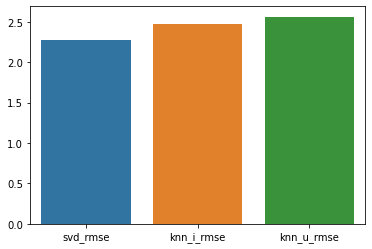

In [48]:
# Visualization of 3 RMSEs

sns.barplot(x=['svd_rmse','knn_i_rmse', 'knn_u_rmse'],y=[accuracy.rmse(pred_svd),accuracy.rmse(pred_knn_item),accuracy.rmse(pred_knn_user)])

In [49]:
# Average rating for test user

# For SVD

svd_pred_df=pd.DataFrame(pred_svd, columns=['uid', 'iid', 'rui', 'est', 'details'])
print('average prediction for test users: ',svd_pred_df['est'].mean())
print('actual average rating by test users: ',svd_pred_df['rui'].mean())
print('average prediction error for test users: ',(svd_pred_df['rui']-svd_pred_df['est']).abs().mean())

average prediction for test users:  8.557900734958228
actual average rating by test users:  8.552657642786398
average prediction error for test users:  1.6426334183873879


In [50]:
# For KNNWithMean User based

knnu_pred_df=pd.DataFrame(pred_knn_user, columns=['uid', 'iid', 'rui', 'est', 'details'])
print('average prediction for test users: ',knnu_pred_df['est'].mean())
print('actual average rating by test users: ',knnu_pred_df['rui'].mean())
print('average prediction error for test users: ',(knnu_pred_df['rui']-knnu_pred_df['est']).abs().mean())

average prediction for test users:  8.42350561213588
actual average rating by test users:  8.552657642786398
average prediction error for test users:  1.759355198039684


In [51]:
# For KNNWithMean item based

knni_pred_df=pd.DataFrame(pred_knn_item, columns=['uid', 'iid', 'rui', 'est', 'details'])
print('average prediction for test users: ',knni_pred_df['est'].mean())
print('actual average rating by test users: ',knni_pred_df['rui'].mean())
print('average prediction error for test users: ',(knni_pred_df['rui']-knni_pred_df['est']).abs().mean())

average prediction for test users:  8.455485149893288
actual average rating by test users:  8.552657642786398
average prediction error for test users:  1.7120273890801105


In [52]:
def get_top_rec(predictions, n=5):
    # First map the predictions to each user.
    top_rec = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_rec[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the n highest ones.
    for uid, user_ratings in top_rec.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_rec[uid] = user_ratings[:n]

    return top_rec

  
    

In [53]:
# For SVD

#recommend top 5 products for test users (SVD)
top_rec = get_top_rec(pred_svd,5)
print('Top 5 recommendations for all test users are: \n')
for key,value in top_rec.items(): print(key,'-> ',value,'\n')



Top 5 recommendations for all test users are: 

Angela ->  [('Lenovo Motorola Moto G 4G (2 Generazione) Smartphone, Display 5 Pollici, LTE, Fotocamera 8 MP, Memoria 8 GB, Android 5 Lollipop, Nero [Italia]', 9.254325440560761), ('Huawei Ascend P8 Smartphone, Display 5.2" FHD, Memoria RAM da 3 GB, Processore HiSilicon Kirin 930 Octa-Core, Fotocamera Principale 13 MP, Grigio', 8.635353155888183), ('Vodafone Smart First 6 Pay As You Go Handset Smartphone - Black', 8.201874638964842), ('Nokia 105 (Black)', 8.016825240462214), ('Samsung Galaxy S6 32GB SM-G920i - Unlocked White (International Version)', 7.550019602107254)] 

Ирина ->  [('ASUS ZenFone 3 Max ZC520TL 16GB (золотистый)', 9.413544742343857), ('Samsung Galaxy S7 edge', 9.167460635970954), ('Sony Xperia Z1 Compact (белый)', 9.017931629380044), ('Sony Xperia L (красный)', 8.904589218824949), ('Apple iPhone 5s 16GB (серебристый)', 8.6723910977259)] 

Наталья ->  [('Samsung N7100 Galaxy Note II 16GB (белый)', 9.84833207913845), ('Sony 

okuyan ->  [('Samsung U800 Cep Telefonu', 9.816048387797876)] 

Станислав ->  [('Apple iPhone 5s 16GB (серый космос)', 9.872427109182992), ('Samsung Galaxy S7 edge', 9.448690225262053), ('Sony Xperia Z (белый)', 9.253799170716173), ('Samsung I8190 Galaxy S III mini 8GB (красный)', 9.167908741060597), ('Samsung Galaxy S4 GT-I9500 16GB (черный)', 8.590822723894451)] 

Arun ->  [('Honor 6X (Grey, 32GB)', 8.606574121394324), ('Samsung Galaxy J7 SM-J700F (Black, 16GB)', 8.58246301638817), ('Apple iPhone 5s (Silver, 16GB)', 8.05475856851462), ('Sony Xperia XA Dual (Lime Gold)', 6.652912991017416)] 

Gonzalo ->  [('Huawei Nexus 6P - Smartphone de 5.7" (Amoled QHD, Qualcomm Snapdragon 810 1.5 GHz, 3 GB RAM, cámara de 13 MP/8 MP, memoria interna de 32 GB, Android 6.0), plateado', 8.261009894476135), ('BQ Aquaris X5 - Smartphone de 5" (WiFi, 2 GB de RAM, memoria interna de 16 GB, cámara 13 MP, Android 5.1) negro y gris antracito - Reacondicionado oficial', 7.586285314718667)] 

Анна ->  [('LG X 

# ->  [('Nokia 5230 Navigation Edition', 8.635418929156721)] 

Ken ->  [('Apple iPhone 6 Plus GSM Unlocked Cellphone, 64GB, Space Gray', 8.206883847619153)] 

M. ->  [('elephone P8000 Smartphone 4G FDD-LTE 64bit MTK6753 Otta Nucleo FHD 5.5 "IPS Android 5.1 3GB+16GB 5MP 13mp Due telecamere il tocco a 360 ° ID imporonta digitale', 8.82068793158033)] 

enrico ->  [('Samsung Galaxy S7 Smartphone, 32 GB, Nero', 8.888452565092882), ('Lenovo Motorola Moto G Smartphone, Display HD 4,5", Processore Qualcomm, Memoria 8 GB, MicroSIM, Android 4.4 OS, Fotocamera da 5 MP, Nero [Germania]', 8.685690554018997), ('Alcatel One Touch 20-04G Telefono Cellulare, Nero', 8.013214413914728), ('Asus ZenFone 2 Laser Smartphone, Display da 5", 16 GB, Dual SIM, Nero [Italia]', 7.91853126706553), ('Samsung J320 Galaxy J3 (2016) Dual SIM 5", Quad Core, 8GB LTE, Nero [Italia]', 7.213103111356535)] 

Stephanie ->  [('Huawei Nexus 6P unlocked smartphone, 32GB Gold (US Warranty)', 8.375285854381536), ('Apple iPhone 5 A

In [54]:
# For KNN Item based


#recommend top 5 products for test users (SVD)
top_rec = get_top_rec(pred_knn_item,5)
print('Top 5 recommendations for all test users are: \n')
for key,value in top_rec.items(): print(key,'-> ',value,'\n')
    


Top 5 recommendations for all test users are: 

Angela ->  [('Huawei Ascend P8 Smartphone, Display 5.2" FHD, Memoria RAM da 3 GB, Processore HiSilicon Kirin 930 Octa-Core, Fotocamera Principale 13 MP, Grigio', 9.89660876757651), ('Vodafone Smart First 6 Pay As You Go Handset Smartphone - Black', 8.5625), ('Lenovo Motorola Moto G 4G (2 Generazione) Smartphone, Display 5 Pollici, LTE, Fotocamera 8 MP, Memoria 8 GB, Android 5 Lollipop, Nero [Italia]', 8.363573120438618), ('Nokia 105 (Black)', 6.0), ('Samsung Galaxy S6 32GB SM-G920i - Unlocked White (International Version)', 5.428571428571429)] 

Ирина ->  [('Samsung Galaxy S7 edge', 9.683275429835557), ('ASUS ZenFone 3 Max ZC520TL 16GB (золотистый)', 9.5000561032333), ('LG Optimus L7 P705 Black', 9.285600863695255), ('Sony Xperia Z1 Compact (белый)', 9.265792850559412), ('Sony Xperia Z1 Compact (розовый)', 9.110402363556101)] 

Наталья ->  [('Samsung I8190 Galaxy S III mini 8GB (красный)', 9.911998235320784), ('Apple iPhone 5s 16GB (сереб

Илья ->  [('Sony Xperia Z1 (белый)', 9.32262997312101), ('Samsung S7270 Galaxy Ace 3 (черный)', 8.963692941257762), ('Sony Xperia L (черный)', 8.766366819387581), ('Samsung S7270 Galaxy Ace 3 (белый)', 8.741306284457194), ('Samsung I8190 Galaxy S III mini 8GB (красный)', 8.741058234643226)] 

Alan ->  [('Samsung G920 Galaxy S6 Smartphone, 32 GB, Oro [Italia]', 10), ('SAMSUNG Galaxy A3 (2017) - 16 GB, Black', 9.626945470227614), ('Huawei Honor 8 Unlocked Smartphone 32 GB Dual Camera - US Warranty (Midnight Black)', 9.61060606060606), ('APPLE iPhone 7 - Silver, 128 GB', 7.678392815967046)] 

fernando ->  [('Samsung Galaxy S5 SM-G900A GSM Unlocked Cellphone, 16GB, Black', 9.702380952380953), ('Samsung Galaxy S4 (I9505) - Smartphone libre Android (pantalla táctil de 4.99", cámara 13 Mp, 16 GB, Quad-Core 1.9 GHz, 2 GB RAM, LTE), Blanco (Versión Europea)', 9.331766355824982), ('Smartphone Lenovo Vibe K5', 8.666666666666666), ('Apple iPhone 5 A1428 Factory Unlocked Cellphone, 16GB, Black', 5.

Никита ->  [('Sony Xperia Z1 Compact (черный)', 10), ('Apple iPhone 5s 16GB (серый космос)', 10), ('Samsung Galaxy A5 (2016)', 9.79622342722693), ('Sony Xperia Z1 Compact (лайм)', 9.593638369214833), ('Samsung N7100 Galaxy Note II 16GB (серый)', 9.56284872744467)] 

Joseph ->  [('APPLE iPhone 7 - Silver, 128 GB', 8.76388888888889), ('Apple iPhone 5s GSM Unlocked Cellphone, 16 GB, Space Gray', 7.561274509803922), ('APPLE iPhone 7 Plus - Black, 128 GB', 6.448275862068965), ('OnePlus 2 (Sandstone Black, 16GB)', 2.5)] 

M ->  [('Huawei Nexus 6P unlocked smartphone, 32GB Gold (US Warranty)', 9.557176726159524), ('Samsung Galaxy S7 Edge zwart / 32 GB', 9.332091110681837), ('Samsung Galaxy S7 goud, roze / 32 GB', 9.229884019573232), ('Sony Xperia XZ zwart / 32 GB', 9.129539665571134)] 

Dan ->  [('Samsung Galaxy Grand Prime Dual Sim Factory Unlocked Phone - Retail Packaging - Gold(International Version)', 9.83094001420309), ('Motorola Moto G 4G SIM-Free Smartphone - Black (8GB) - Discontinued

Adam ->  [('Apple iPhone 5s T-Mobile Cellphone, 16GB, Space Gray', 9.349340296100447), ('APPLE iPhone 7 - Silver, 32 GB', 9.339318828679257), ('OnePlus 3 (Soft Gold, 64 GB)', 8.167986354616843)] 

Kindle-Kunde ->  [('Samsung Galaxy Note II N7100 Smartphone 16GB (14 cm (5,5 Zoll) AMOLED-Touchscreen, Quad-core, 1,6GHz, 8 Megapixel Kamera, Android 4.1) blue', 8.594708230519037), ('Sony Xperia Z3 Compact Smartphone (11,7 cm (4,6 Zoll) HD-TRILUMINOS-Display, 2,5 GHz-Quad-Core-Prozessor, 20,7 Megapixel-Kamera, Android 4.4) meergrün', 3.550343701509457)] 

Matthew ->  [('Sony Xperia XZ zwart / 32 GB', 7.735368364486177)] 

Domenico ->  [('Huawei P8 Lite Smartphone, Display 5" IPS, Processore Octa-Core 1.5 GHz, Memoria Interna da 16 GB, 2 GB RAM, Fotocamera 13 MP, monoSIM, Android 5.0, Bianco [Italia]', 8.338026638408786), ('Apple iPhone 5C 16GB - sbloccato - blu / ciano', 7.715939333482893)] 

Isabel ->  [('Huawei P9 lite - Smartphone libre Android (pantalla 5.2", cámara 13 MP, 16 GB, Octa-Co

Alicia ->  [('SAMSUNG Galaxy A3 (2017) - 16 GB, Black', 8.859649122807017), ('BLU Vivo XL Smartphone - 5.5" 4G LTE - GSM Unlocked - Solid Gold', 7.363636363636363), ('Apple iPhone 5 16GB Verizon Wireless CDMA 4G LTE Cell Phone - White', 6.857142857142857), ('Doogee 4G 64bit VALENCIA2 Y100 Pro MTK6735P 1.3GHz Quad core 5.0 Pulgada 1280 x 720 pixels IPS pantalla 2GB+16GB Android 5.1 13MP Cámara Doble SIM tarjeta Smartphone libre desbloqueado Plateado', 3.1304347826086953)] 

Benjamin ->  [('LG G4 Unlocked Smartphone with 32GB Internal Memory, 16 MP Camera and 5.5-Inch IPS Quantum Display for GSM and CDMA, US Warranty (Black Leather)', 4.374603174603175)] 

Greg ->  [('Nokia Lumia 635 8GB Unlocked GSM 4G LTE Windows 8.1 Quad-Core Phone - Black', 8.813725490196077), ('Huawei - P8 Lite - Smartphone Débloqué - 4G (Ecran : 5 pouces - 16 Go - Double SIM - Android 5.0 Lollipop) - Or', 2.0)] 

Ian ->  [('APPLE iPhone 7 - Silver, 32 GB', 7.567261092923326)] 

Enrique ->  [('Honor 7 - Smartphone l

In [55]:
# For KNN User based


#recommend top 5 products for test users (SVD)
top_rec = get_top_rec(pred_knn_user,5)
print('Top 5 recommendations for all test users are: \n')
for key,value in top_rec.items(): print(key,'-> ',value,'\n')
    


Top 5 recommendations for all test users are: 

Angela ->  [('Lenovo Motorola Moto G 4G (2 Generazione) Smartphone, Display 5 Pollici, LTE, Fotocamera 8 MP, Memoria 8 GB, Android 5 Lollipop, Nero [Italia]', 8.837534095685553), ('Samsung Galaxy S6 32GB SM-G920i - Unlocked White (International Version)', 8.428571428571429), ('Vodafone Smart First 6 Pay As You Go Handset Smartphone - Black', 8.428571428571429), ('Nokia 105 (Black)', 8.428571428571429), ('Huawei Ascend P8 Smartphone, Display 5.2" FHD, Memoria RAM da 3 GB, Processore HiSilicon Kirin 930 Octa-Core, Fotocamera Principale 13 MP, Grigio', 7.9621620664966954)] 

Ирина ->  [('ASUS ZenFone 3 Max ZC520TL 16GB (золотистый)', 9.35586512994586), ('Samsung Galaxy S5 SM-G900F 16GB (белый)', 9.22506802617189), ('Sony Xperia Z1 Compact (белый)', 9.138768852818611), ('Samsung Galaxy S7 edge', 9.06516407639068), ('Sony Xperia L (красный)', 8.939433899667545)] 

Наталья ->  [('Sony Xperia M (черный)', 9.776039018831767), ('Samsung N7100 Gala


Иван ->  [('Samsung Galaxy A5', 9.266940996840102), ('Sony Xperia Z1 (черный)', 9.142570289019554), ('Sony Xperia L (белый)', 8.930851501261357), ('LG Optimus L7 P705 Black', 8.598304446219526), ('Sony Xperia L (красный)', 8.425462628344697)] 

Riccardo ->  [('Lenovo Motorola Moto G LTE Smartphone, Display 4.5", Fotocamera 5 MP, Memoria 8 GB, Quad-Core 1.2 GHz, 1 GB RAM, Micro SD, Android 4.4.3, Bianco [Italia]', 9.062448453583498), ('Huawei Ascend P6 Smartphone, 8 GB, Fotocamera 8 MP, Display 4.7 Pollici HD, Wi-Fi, Rosa', 9.050655071515262), ("Nokia Microsoft Lumia 550 Smartphone LTE, Display 4.7' Pollici HD LCD (1280x720), 8 GB Memoria interna, Processore Quad Core Snapdragon 210, Bianco [Italia]", 7.586090702781006), ('Asus ZenFone 2 Laser Smartphone, Display da 5", 16 GB, Dual SIM, Nero [Italia]', 7.5211809001837135)] 

e-bit ->  [('Smartphone Asus ZenFone 3 ZE520KL', 9.40190645188945), ('Smartphone LG G2 D805', 9.306215088804574), ('Smartphone Samsung Galaxy S5 SM-G900', 9.225806

Deepak ->  [('Samsung Galaxy J3 (8GB)', 8.897175054797746), ('Tracfone Motorola Moto E Android Prepaid Phone with Triple Minutes (Tracfone)', 8.782148200061824), ('Honor 6X (Grey, 32GB)', 7.533138401559454), ('Nokia 105 (Black)', 6.95906432748538), ('Apple iPhone SE (Gold, 16GB)', 1.7038969797744565)] 

Davide ->  [('Samsung Galaxy A5 2016 Smartphone LTE, 16GB, Nero', 10), ("Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Nero [Italia]", 9.955939498678296), ('Samsung Galaxy J5 Smartphone, Oro [Italia]', 9.77851598535644), ('Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco', 9.758448331318334), ('Meizu M2 Note Smartphone, 5.5" Full HD, 4G, 13MPX, Dual SIM, 16GB, Bianco [EU]', 9.564224037528334)] 

xceday ->  [('Nokia 6300 Cep Telefonu', 10), ('Samsung U800 Cep Telefonu', 10), ('Nokia E52


Heather ->  [('Apple iPhone 5s GSM Unlocked Cellphone, 16 GB, Space Gray', 7.154218854439943), ('Apple iPhone 5c 32GB (Green) - Verizon Wireless', 7.111111111111111), ('APPLE iPhone 7 Plus - Black, 128 GB', 4.650668450743358)] 

Natalia ->  [('Apple iPhone 5s GSM Unlocked Cellphone, 16 GB, Space Gray', 9.193939393939395), ('Huawei P8 Champagne / 16 GB - Overzicht', 8.3), ('Apple iPhone 5 A1428 Factory Unlocked Cellphone, 16GB, Black', 7.8), ('Huawei P8 lite Dual-SIM Smartphone (5 Zoll (12,7 cm) Touch-Display, 16 GB Speicher, Android 5.0) weiß', 2.5962962962962965)] 

Marta ->  [('Motorola Moto G (3ª Generación) + Carcasa Oficial color turquesa - Smartphone libre Android 6 (4G, pantalla 5", cámara 13 Mp, 16 GB, Quad Core 1.4 GHz, 2 GB de RAM), negro', 10)] 

Ashley ->  [('LG Nexus 5X Unlocked Smartphone with 5.2-Inch 32GB H790 4G LTE (Carbon Black)', 7.9408165339721934), ('Samsung Galaxy S6, Black Sapphire 32GB (Verizon Wireless)', 7.839654253137532), ('Asus ZenFone 2 Unlocked Cellphon

michael ->  [('Samsung Galaxy S5 Smartphone (5,1 Zoll (12,9 cm) Touch-Display, 16 GB Speicher, Android 4.4) electric blue', 10), ('Sony Xperia Z1 Compact Smartphone (4,3 Zoll (10,9 cm) Touch-Display, 16 GB Speicher, Android 4.3) pink', 7.110865809365837)] 

Stefan ->  [("Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Bianco [Italia]", 9.032771502557633), ('Samsung Galaxy S III i9300 Smartphone 16 GB (12,2 cm (4,8 Zoll) HD Super-AMOLED-Touchscreen, 8 Megapixel Kamera, Micro-SIM, Android 4.0) schwarz', 7.583892870110335), ('Sony Xperia Z3 Compact Smartphone (11,7 cm (4,6 Zoll) HD-TRILUMINOS-Display, 2,5 GHz-Quad-Core-Prozessor, 20,7 Megapixel-Kamera, Android 4.4) meergrün', 3.3913190483589277)] 

Marcel ->  [('Samsung Galaxy S7 Edge zwart / 32 GB', 9.245548058806305)] 

john ->  [('HUAWEI P9 Lite - 16 GB, Black', 9.714285714285714), ('Samsung Galaxy S4 SGH-I337 Unloc

In [56]:
def get_model_cv(model):
    model_cv = cross_validate(model,data, measures=['RMSE'], cv=5, verbose=False)
    print('\n Mean cv score:', round(model_cv['test_rmse'].mean(),2),'\n')
    display(model_cv)
    return (round(model_cv['test_rmse'].mean(),2))

In [57]:
# Hyper Tunning


# For SVD

param_grid = {'n_factors': np.arange(1,20)}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5)
gs.fit(data)


# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])



2.264125226188794
{'n_factors': 1}


In [58]:
svd_h = SVD(n_factors=1)
svd_h.fit(trainset)


# Test data
pred_svdh = svd_h.test(testset)

# Few Pedictions on test data
pred_svdh[0:5]

[Prediction(uid='Angela', iid='Huawei Ascend P8 Smartphone, Display 5.2" FHD, Memoria RAM da 3 GB, Processore HiSilicon Kirin 930 Octa-Core, Fotocamera Principale 13 MP, Grigio', r_ui=6.0, est=8.861095621107799, details={'was_impossible': False}),
 Prediction(uid='Ирина', iid='Samsung Galaxy S5 SM-G900F 16GB (черный)', r_ui=9.0, est=7.500701633894137, details={'was_impossible': False}),
 Prediction(uid='Наталья', iid='Samsung N7100 Galaxy Note II 16GB (белый)', r_ui=10.0, est=9.70990823242979, details={'was_impossible': False}),
 Prediction(uid='Артем', iid='Sony Xperia Z (черный)', r_ui=10.0, est=8.734660293819626, details={'was_impossible': False}),
 Prediction(uid='Christine', iid='Apple iPhone 6 16GB Factory Unlocked GSM 4G LTE Internal Smartphone - Space Gray', r_ui=2.0, est=6.329965386089212, details={'was_impossible': False})]

In [59]:
# For Hyper tunned SVD

print("SVD:")
svd_cvh=get_model_cv(svd_h)

SVD:

 Mean cv score: 2.26 



{'test_rmse': array([2.28584702, 2.29686126, 2.21240718, 2.27682285, 2.24474102]),
 'fit_time': (0.32787346839904785,
  0.3177483081817627,
  0.3203105926513672,
  0.31668567657470703,
  0.3389573097229004),
 'test_time': (0.042562007904052734,
  0.038350820541381836,
  0.047864675521850586,
  0.034456491470336914,
  0.0406033992767334)}

In [60]:
# Crosss vaidation for KNN Item

print("KNN Item:")
knni_cv=get_model_cv(KNN_item)

KNN Item:
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.

 Mean cv score: 2.48 



{'test_rmse': array([2.47557365, 2.50309789, 2.49243775, 2.44665451, 2.4915948 ]),
 'fit_time': (0.18866181373596191,
  0.1825559139251709,
  0.18769383430480957,
  0.18854451179504395,
  0.17508649826049805),
 'test_time': (0.23986053466796875,
  0.2566840648651123,
  0.2598574161529541,
  0.24803495407104492,
  0.23961949348449707)}

In [61]:
# Crosss vaidation for KNN User

print("KNN User:")
knnu_cv=get_model_cv(KNN_user)

KNN User:
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.

 Mean cv score: 2.5 



{'test_rmse': array([2.48856919, 2.55825235, 2.4817611 , 2.4956334 , 2.47266333]),
 'fit_time': (0.2718167304992676,
  0.2640409469604492,
  0.2796971797943115,
  0.2618367671966553,
  0.269395112991333),
 'test_time': (0.32239508628845215,
  0.32149815559387207,
  0.32747936248779297,
  0.34491562843322754,
  0.3202173709869385)}

<AxesSubplot:>

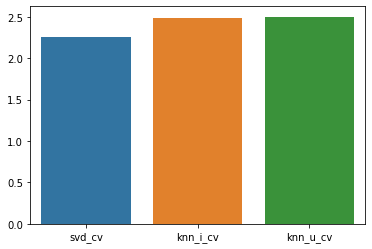

In [62]:
# Visualization of 3 cv RMSEs

sns.barplot(x=['svd_cv','knn_i_cv', 'knn_u_cv'],y=[svd_cvh,knni_cv,knnu_cv])